# **PRÁCTICA 4: MODELOS CONEXIONISTAS - Perceptrones multicapa con Keras**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 3ª curso del Grado Ciencia de Datos

En esta práctica vamos a dar como herramienta Google Colab para evitar problemas de instalación y poder aprovechar al máximo el tiempo de la práctica. Se recomienda que os instaléis todo lo necesario en vuestros equipos para poder trabajar de forma autónoma. Usaremos en esta práctica Keras (https://keras.io/) que facilita el uso de la librería Tensorflow (https://www.tensorflow.org/) especializada en aprendizaje profundo o Deep Learning. En las dos páginas web tienes una gran cantidad de recursos que te ayudarán si encuentras dificultades con estas herramientas.

**1. Nuestro primer modelo neuronal básico.**

Vamos a implementar un modelo neuronal usando esta herramienta. Vamos a utilizar un conjunto de datos que podríamos calificar como clásico, Pima Indians Diabetes Dataset. Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales norteamericano. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene, o no, diabetes. Para ello nos basaremos en determinadas mediciones diagnósticas incluidas en el conjunto de datos. Todos los pacientes aquí son mujeres de al menos 21 años de edad de origen indio Pima Es un problema de clasificación binaria (inicio de la diabetes como 1 o no como 0). Las variables de entrada que describen a cada paciente son numéricas y tienen escalas variables. El fichero de datos está en formato .csv y debe estar en tu directorio de Google Drive donde vayas a trabajar con el el Google Colab.

En lo que sigue vamos a escribir las instrucciones de Keras necesarias para implementar el modelo pero vamos a dejar en blanco las que deberías conocer. Como verás sigue una estructura “clásica” de análisis de datos.

1. Carga de librerías.
```
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
```
2. Carga de datos.
```
datos = pd.read_csv("diabetes.csv")
# Cogemos todas las filas y las columnas de la 0 a la 8
X = datos[:,0:8]
# Cogemos todas las filas y la columna 8
Y = datos[:,8]
```
3. Creamos el modelo.
```
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='random_uniform', activation= 'sigmoid' ))
model.add(Dense(8, kernel_initializer='random_uniform' , activation= 'sigmoid' ))
model.add(Dense(1, kernel_initializer='random_uniform' , activation= 'sigmoid' ))
```
4. Compilamos el modelo.
```
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
```
5. Ajustamos el modelo
```
model.fit(X, Y, validation_split=0.25, epochs=300, batch_size=10)
```
6. Evaluamos del modelo 
```
medida = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], medida[1]*100))
```


**EJERCICIO 1**  
• Implementa el anterior código y comprueba su funcionamiento.  


In [ ]:
# Nota:
# Esto no habrá que hacerlo pero este código no es de los más optimo, no es un buen modelo de clasificacion. 
# Si no s fijamos, primero, podemos ver que no tenemos un escalado de los datos (las variables tienen diferentes tamaños). 
# Esto lo deberíamos escalar por ejemplo con, MinMaxScaler.
# Por otro lado, no estamos separando los datos entre test y entrenamiento, esto se debería hacer siempre antes de realizar un modelo.
# Por último, queremos hacer clasificación pero nuestro modelo tiene una activacion de sigmoide. 
# Si hacemos esto, no estamos clasificando la clase entre 0 y 1. Para hacer una buena clasificación lo que se debería hacer
# sería clasificar a partir del 0.5, teninedo así las variables o 0 o 1.

#### Cargar librerías
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

#### Carga de datos
datos = pd.read_csv("diabetes.csv")
# iloc[segmentación de fila = todo, segmentación de columna = de la 0 hasta la 8]
X = datos.iloc[:,0:8]
# iloc[segmentación de fila = todo, segmentación de columna = la 8]
Y = datos.iloc[:,8]

#### Creamos el modelo.
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='random_uniform', activation= 'sigmoid' ))
model.add(Dense(8, kernel_initializer='random_uniform' , activation= 'sigmoid'))
model.add(Dense(1, kernel_initializer='random_uniform' , activation= 'sigmoid'))

#### Compilamos el modelo.
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])

#### Ajustamos el modelo
model.fit(X, Y, validation_split=0.25, epochs=300, batch_size=10)

#### Evaluamos del modelo 
medida = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], medida[1]*100))

Epoch 1/300
58/58 [==============================] - 1s 6ms/step - loss: 0.6940 - accuracy: 0.4521 - val_loss: 0.6764 - val_accuracy: 0.6354
Epoch 2/300
58/58 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.6320 - val_loss: 0.6626 - val_accuracy: 0.6354
Epoch 3/300
58/58 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6297 - val_loss: 0.6563 - val_accuracy: 0.6354
Epoch 4/300
58/58 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.6448 - val_loss: 0.6555 - val_accuracy: 0.6354
Epoch 5/300
58/58 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.6386 - val_loss: 0.6555 - val_accuracy: 0.6354
Epoch 6/300
58/58 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.6587 - val_loss: 0.6553 - val_accuracy: 0.6354
Epoch 7/300
58/58 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.6379 - val_loss: 0.6558 - val_accuracy: 0.6354
Epoch 8/300
5

• Varía los siguientes parámetros; consulta la ayuda de Keras: 
(https://keras.io/) y comprueba si se mejora/empeora el funcionamiento.  

> • Algoritmos de optimización (por ejemplo el RMSprop).

> • Funciones de inicialización.


> • Funciones de activación (por ejemplo ReLU).  

> • Número de neuronas por capa y número de capas.  

**RESLUTADOS:**
---

---

En este apartado vamos a comentar cada uno de los parámetros analizados con anterioridad para ver si se mejora/empeora el funcionamiento.



**• Algoritmos de optimización (por ejemplo el RMSprop).** 

Un optimizador es uno de los dos argumentos necesarios para compilar un modelo de Keras. Se puede crear una instancia de un optimizador antes de pasarlo a model.compile(), o puede pasarlo por su identificador de cadena.


Podemos probar con los algoritmos de optimización siguientes: SGD, RMSprop, Adán, Adadelta, Adagrad, Adamax, Nadam y Ftrl

Nosotras hemos probado y comparado el optimizer= 'adam' y el optimizer= 'rmsprop'.

1. El optimizer = 'adam' es un método de descenso de gradiente estocástico que se basa en la estimación adaptativa de momentos de primer y segundo orden. Hemos obtenido un *accuracy: 74.74%*

2. El optimizer= 'rmsprop' es, por un lado antener un promedio móvil (descontado) del cuadrado de gradientes y a su vez, divida el gradiente por la raíz de este promedio. Esta implementación de RMSprop utiliza un impulso simple, no el impulso de Nesterov. Hemos obtenido un *accuracy: 72.53%*

Por lo que podemos decir que en este caso no ha mejorado el funcionamiento con el optimizer= 'rmsprop'.



**• Funciones de inicialización.**

En el caso de las funciones de inicialización, estos definen la forma de establecer los pesos aleatorios iniciales de las capas de Keras. Los argumentos de palabras clave que se utilizan para pasar inicializadores a las capas dependen de la capa. Por lo general, es simple kernel_initializer y bias_initializer:

Podemos probar con las funciones de inicialización siguientes: RandomNormal, RandomUniform, TruncatedNormal, Zeros, Ones, GlorotNormal, Identity, Orthogonal, Constant y VarianceScaling. Incluso también se le puede pasar un invocable personalizado como inicializador.

Nosotras hemos probado y comparado el kernel_initializer='random_uniform' y el kernel_initializer='random_normal'.

1. El kernel_initializer='random_uniform' es un inicializador que genera tensores con distribución uniforme. Hemos obtenido un *accuracy: 74.74%*

2. El kernel_initializer='random_normal' es un inicializador que genera tensores con distribución normal. Hemos obtenido un *accuracy: 74.48%*

Por lo que podemos decir que en este caso no ha mejorado el funcionamiento con el kernel_initializer='random_normal' pero no de forma significativa.



**• Funciones de activación (por ejemplo ReLU).**

Las activaciones se pueden utilizar a través de una Activationcapa o mediante el activationargumento admitido por todas las capas de avance. Todas las activaciones integradas también se pueden pasar a través de su identificador de cadena.

Podemos probar con las funciones de activación siguientes: relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu y exponential. También puede usar un TensorFlow invocable como activación. 

Nosotras hemos probado y comparado el activation= 'sigmoid'' y el activation= 'relu'.

1. La función de activation= 'sigmoid' (sigmoid(x) = 1 / (1 + exp(-x)). Aplica la función de activación sigmoidea. Para valores pequeños (<-5), sigmoid devuelve un valor cercano a cero, y para valores grandes (> 5) el resultado de la función se acerca a 1. Hemos obtenido un *accuracy: 74.74%*

2. La función de activation = 'relu' aplica la función de activación de la unidad lineal rectificada. Con valores predeterminados, esto devuelve la activación estándar de ReLU:, max(x, 0) el máximo de elementos de 0 y el tensor de entrada. Hemos obtenido un *accuracy: 65.10%*

Por lo que podemos decir que en este caso no ha mejorado el funcionamiento con el activation = 'relu'.


**• Número de neuronas por capa y número de capas.**

En este caso vamos a ver como funciona este parámetro si cambiamos el número de neuronas, el número de capas y estas dos a la vez para ver si esta combinación mejora. 

Si cambiamos el número de neuronas:

1. Si lo hacemos con 2 capas ocultas (con 8 neuronas cada una) obtenemos un *accuracy: 74.74%*.
2. Si lo hacemos con 2 capas ocultas (una con 8 neuronas y otra con 10) obtenemos un *accuracy: 75.13%*.
3. Si lo hacemos con 2 capas ocultas (una con 8 neuronas y otra con 2) obtenemos un *accuracy: 73.83%%*.

Se puede crear un modelo secuencial de forma incremental a través del add()método, cambiando así el número de capas: 

1. Si lo hacemos con 2 capas ocultas (con 8 neuronas cada una) obtenemos un *accuracy: 74.74%*.
2. Si lo hacemos con 5 capas ocultas (con 8 neuronas cada una) obtenemos un *accuracy: 74.48%*.

Si realizamos las dos a la vez:

1. Si lo hacemos con 2 capas ocultas (con 8 neuronas cada una) obtenemos un *accuracy: 74.74%*
2. Si lo hacemos con 5 capas ocultas (con 10 neuronas cada una) obtenemos un *accuracy:  72.53%*


Por lo que podemos decir que en este caso no ha mejorado el funcionamiento cambiando el número de capas. Pero si que ha mejorado cambiando el número de neuronas por capas. Por otro lado, si combinamos estos dos parámetros no mejora el funcionamiento del modelo.

**2. Resolución del problema MNIST con MLP.**

Vamos a resolver el problema del MNIST usando Keras.   

La estructura planteada es la de la siguiente figura donde tenemos una serie de capas densas donde la última capa posee una función de activación softmax, que otorga la

In [ ]:
# Importamos la imagen
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['image.png']))

Saving image.png to image.png


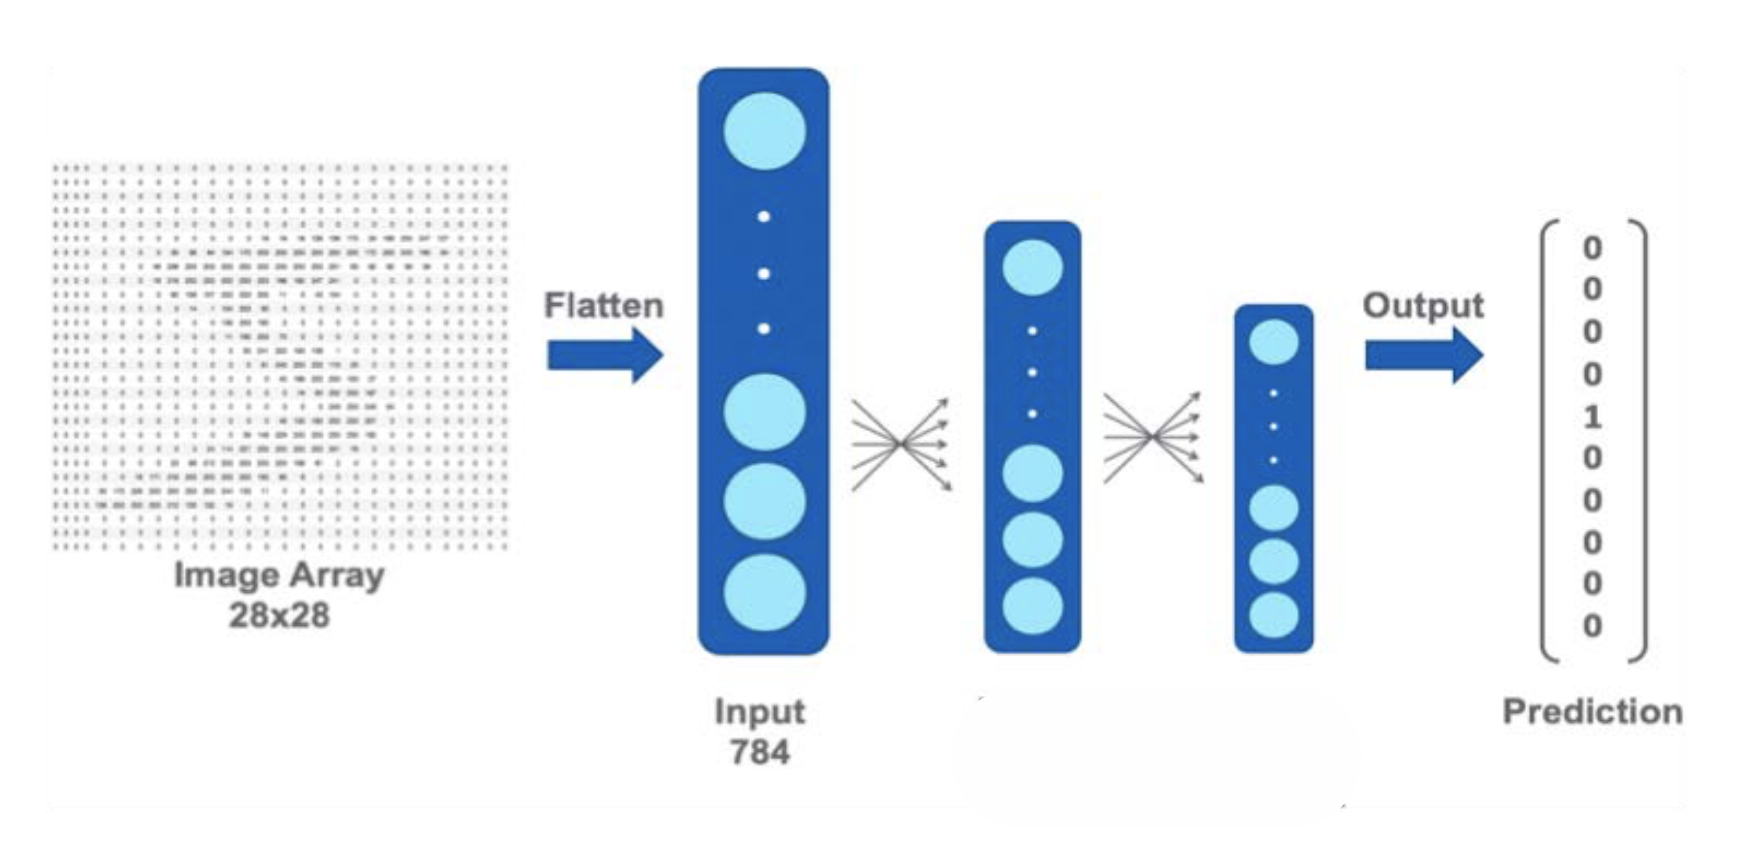

In [ ]:
im

máxima probabilidad a la clase predicha de entre las 10. Fíjate que lo que hacemos es “estirar” la imagen, poniéndola como columna (Flatten) por lo que perdemos toda información espacial (hecho que no ocurre al aplicar convolucionales).   

En este caso hacemos clasificación, por lo que tendremos que convertir las salidas a categóricas.

1. Carga de librerías.
```
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
```
2. Carga de datos.
```
mnist = keras.datasets.mnist
(img_rows, img_cols) = (28,28)
(x_train, y_train),(x_test, y_test) = mnist.load_data()
```
3. Visualización de los datos.
```
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.gray)
    plt.xlabel(y_test[i])
```
4. Codificación/normalización de los datos.
```
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train, x_test = x_train / 255.0, x_test / 255.0
```
5. Construimos el modelo y lo describimos.
```
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
```
6. Asignamos función de coste y optimizador.
```
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_split=0.25, epochs=10, batch_size=64)
```
7. Evaluamos
```
model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], medida[1]*100))
```


• Implementa el anterior código y comprueba su funcionamiento

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_64 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
704/704 [==============================] - 5s 7ms/step - loss: 0.4383 - accuracy: 0.8778 - val_loss: 0.1599 - val_accuracy: 0.9529
Epoch 2/10
704/704 [==============================] - 5s 7ms/step - loss: 0.1117 - accuracy: 0.9675 - val_loss: 0.1186 - val_accuracy: 0.9649
Epoch 3/10
704/704 [==============================] - 5s 7ms/step - loss: 0.0679 - accuracy: 

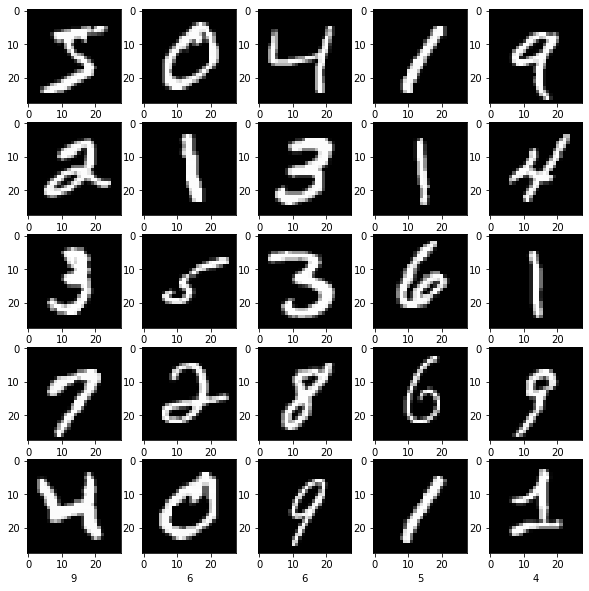

In [ ]:
#### Carga de librerías.
from tensorflow import keras
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten

#### Carga de los datos.
mnist = keras.datasets.mnist
(img_rows, img_cols) = (28,28)
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#### Visualización de los datos.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.gray)
    plt.xlabel(y_test[i])

#### Codificación/normalización de los datos.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train, x_test = x_train / 255.0, x_test / 255.0

#### Construimos el modelo y lo describimos.
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

#### Asignamos función de coste y optimizador.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_split=0.25, epochs=10, batch_size=64)

#### Evaluamos
medida = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], medida[1]*100))


• Varía los siguientes parámetros; consulta la ayuda de Keras : (https://keras.io/) y comprueba si se mejora/empeora el funcionamiento.  

> • Número de neuronas por capa y número de capas.

> • Introduce términos de dropout; para ello tendrás que usar from keras.layers import Dropout y la instrucción model.add(Dropout(p)) siendo p la probabilidad de dropout donde corresponda (usa 0.2 y 0.5) ¿mejora la generalización del modelo?.

> • Algoritmos de optimización (por ejemplo el RMSprop).  

> • Funciones de inicialización y de activación.

> • ¿Cómo afecta el tamaño de batch al entrenamiento?



**RESLUTADOS:**
---

---

Como ya se han comentado algunos de estos parámetros con anterioridad en el ejercicio 1. Se omitirá su explicación en este apartado, dejando solo el comentario de comparación de mejora/empeora de funcionamiento. 

**• Número de neuronas por capa y número de capas.**

Al igual que en el ejercicio 1 vamos a ver como funciona este parámetro si cambiamos el número de neuronas, el número de capas y estas dos a la vez para ver si esta combinación mejora. 

Si cambiamos el número de neuronas:

1. Si lo hacemos con 1 capa oculta (con 512 neuronas obtenemos un *accuracy: 97.89%*
2. Si lo hacemos con 1 capa oculta (con 100 neuronas obtenemos un *accuracy: 97.44%*
3. Si lo hacemos con 1 capa oculta (con 1000 neuronas) obtenemos un *accuracy: 97.71%*.

Se puede crear un modelo secuencial de forma incremental a través del add()método, cambiando así el número de capas: 

1. Si lo hacemos con 1 capa oculta (con 512 neuronas) obtenemos un *accuracy: 97.89%*
2. Si lo hacemos con 5 capas ocultas (con 512 neuronas cada una) obtenemos un *accuracy: 97.65%*.

Si realizamos las dos a la vez:

1. Si lo hacemos con 1 capa oculta (con 512 neuronas ) obtenemos un *accuracy: 97.89%*
2. Si lo hacemos con 5 capas ocultas (con 100 neuronas cada una) obtenemos un *accuracy: accuracy:  97.75%*
3. Si lo hacemos con 5 capas ocultas (con 1000 neuronas cada una) obtenemos un *accuracy: accuracy: 97.87%*

Por lo que podemos decir que en este caso no ha mejorado el funcionamiento aumentando el número de neuronas por capa y el número de capas, pero no cambia significativamente. 

Por otro lado, podemos decir que a menor número de neuronas mejor funcionamiento del modelo.

Finalmente, si combinamos estos dos parámetros también empeoraría el funcionamiento del modelo pero al igual que antes, no significativamente e incluso se vuelve mucho más lento.

**• Introduce términos de dropout; para ello tendrás que usar from keras.layers import Dropout y la instrucción model.add(Dropout(p)) siendo p la probabilidad de dropout donde corresponda (usa 0.2 y 0.5) ¿mejora la generalización del modelo?.**

La capa de abandono establece aleatoriamente las unidades de entrada en 0 con una frecuencia de rate en cada paso durante el tiempo de entrenamiento, lo que ayuda a evitar el sobreajuste. Las entradas que no están configuradas en 0 se escalan en 1 / (1 - tasa) de modo que la suma de todas las entradas no cambia.

Nosotras hemos probado y comparado el parámetro p = 0.2 y p = 0.5.

1. Sin dropout obtenemos un *accuracy: 97.89%*

2. Con p = 0.2 obtenemos un *accuracy: 98.14%.*

2. Con p = 0.2 obtenemos un *accuracy: 98.14%.*

Por lo que podemos decir que en este caso ha mejorado el funcionamiento añadiendo los términos de dropout.

**• Algoritmos de optimización (por ejemplo el RMSprop).**

Nosotras hemos probado y comparado el optimizer= 'adam' y el optimizer= 'rmsprop'.

1. Con el optimizer = 'adam'  obtenemos un *accuracy: 97.89%*

2. Con el optimizer= 'rmsprop' obtenemos un *accuracy: 98.16%.  

Por lo que podemos decir que en este caso ha mejorado el funcionamiento con el optimizer= 'rmsprop'.


**• Funciones de inicialización y de activación.**

Por un lado, hemos probado y comparado el kernel_initializer='random_uniform' y el kernel_initializer='random_uniform'.

1. Con el kernel_initializer='random_uniform'  obtenemos un *accuracy: 97.70%*

2. Con el kernel_initializer='random_normal' obtenemos un *accuracy:  98.12%.  

Por lo que podemos decir que en este caso ha mejorado el funcionamiento con el kernel_initializer='random_normal'.

Por otro lado,  hemos probado y comparado el activation= 'sigmoid' y el activation= 'relu'.

1. Con la función de activation = 'relu' obtenemos un *accuracy: 97.89%*

2. Con la función de activation= 'sigmoid' obtenemos un *accuracy: 97.71%*

Por lo que podemos decir que en este caso no ha mejorado el funcionamiento con el activation= 'sigmoid'.

**• ¿Cómo afecta el tamaño de batch al entrenamiento?**

El  batch_size es el argumento que indica el tamaño que se usará de estos lotes en el método fit() en una iteración del entrenamiento para actualizar el gradiente. Es decir, batch_size indica el número de datos que usaremos para cada actualización de los parámetros del modelo. El tamaño óptimo dependerá de muchos factores.

El tamaño de batch se usa para reducir el coste computacional (uso de memoria) al procesar el conjunto de entrenamiento por batches o bloques. En un epoch cualquiera, no se le pasa al algoritmo todo el conjunto de golpe, sino batch a batch, hasta completar el total de datos de entrenamiento.

Nosotras hemos probado y comparado el batch_size = 64, batch_size=20 y batch_size=90.

- Con el batch_size = 20, obtenemos un *accuracy: 97.82%*
- Con el batch_size = 64, obtenemos un *accuracy: 97.89%*
- Con el batch_size = 90, obtenemos un *accuracy: 98.01%*

Por lo que podemos decir que en este caso ha mejorado el funcionamiento con el atch_size = 90.

---


